## 1. Import Libraries

In [136]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

## 2. Load Data

In [137]:
data = tf.keras.preprocessing.image_dataset_from_directory('data\known_images')

Found 133 files belonging to 4 classes.


In [138]:
data_iterator = data.as_numpy_iterator()

In [139]:
batch = data_iterator.next()

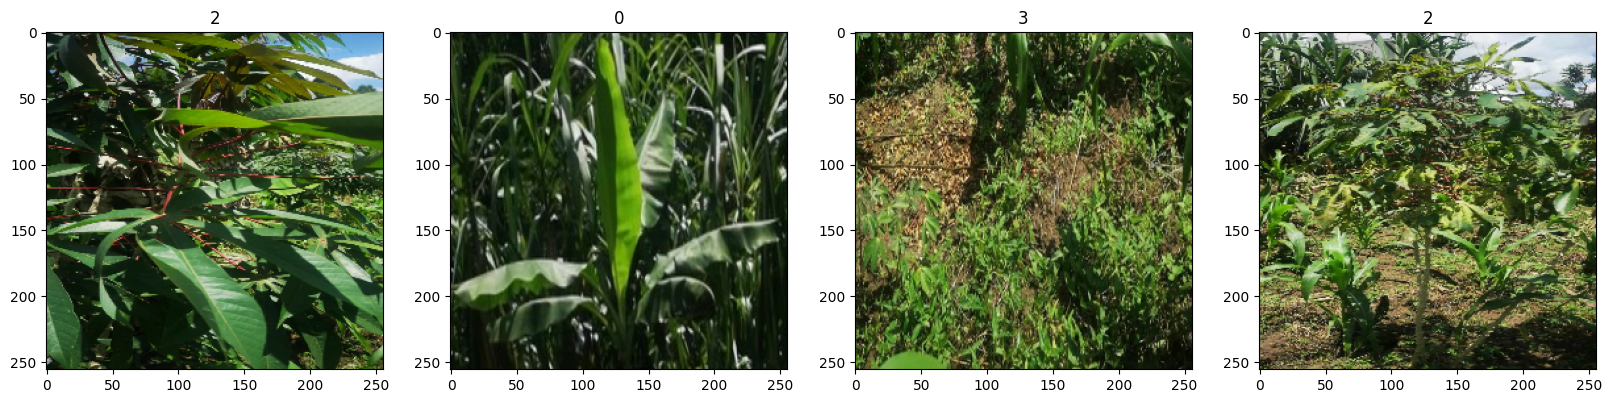

In [140]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 3. Scale Data

In [141]:
data = data.map(lambda x,y: (x/255, y))

In [142]:
data.as_numpy_iterator().next()

(array([[[[0.04852941, 0.05637255, 0.01323529],
          [0.04807224, 0.05591539, 0.01277813],
          [0.06891084, 0.07675398, 0.03361673],
          ...,
          [0.0197663 , 0.04893296, 0.        ],
          [0.06699698, 0.08341854, 0.02796032],
          [0.06498784, 0.07675254, 0.03679295]],
 
         [[0.06815784, 0.07600097, 0.03286372],
          [0.0632353 , 0.07107843, 0.02794118],
          [0.06379873, 0.07164187, 0.02850462],
          ...,
          [0.09877499, 0.11654221, 0.06615014],
          [0.08216003, 0.09346613, 0.04050915],
          [0.06010934, 0.06953795, 0.02873679]],
 
         [[0.05386795, 0.06171109, 0.01857384],
          [0.05667126, 0.0645144 , 0.02137714],
          [0.05231311, 0.06015625, 0.01701899],
          ...,
          [0.06679161, 0.08247788, 0.0416255 ],
          [0.04236079, 0.05069413, 0.00682158],
          [0.11022422, 0.11806736, 0.07493011]],
 
         ...,
 
         [[0.04225787, 0.05402258, 0.02401339],
          [0.04193

## 4. Split Data

In [144]:
## Labe Encoding
from sklearn.preprocessing import LabelEncoder


# Assuming your target labels are stored in a variable called 'data'
labels = data.class_names

# Assuming your target labels are stored in a variable called 'labels'
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

AttributeError: 'MapDataset' object has no attribute 'class_names'

In [124]:
train_size = int(len(data)*.9)
val_size = int(len(data)*.10)
test_size = int(len(data)*.0)

In [125]:
train_size

4

In [126]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 5. Build Deep Learning Model

In [127]:
train

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [129]:
model = Sequential()

In [130]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model without the top (classification) layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add your own classification layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # Change units to 4 and activation to 'softmax'

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)


In [131]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [132]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

## 6. Train

In [133]:
logdir='logs'

In [134]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [135]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


ValueError: in user code:

    c:\program files\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    c:\program files\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\program files\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    c:\program files\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    c:\program files\python38\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    c:\program files\python38\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    c:\program files\python38\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\keras\losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    c:\program files\python38\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\keras\backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    c:\program files\python38\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 4) are incompatible


## 7.Plot Performance

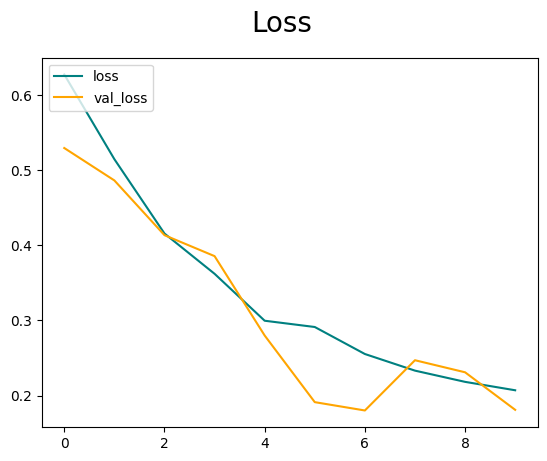

In [110]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

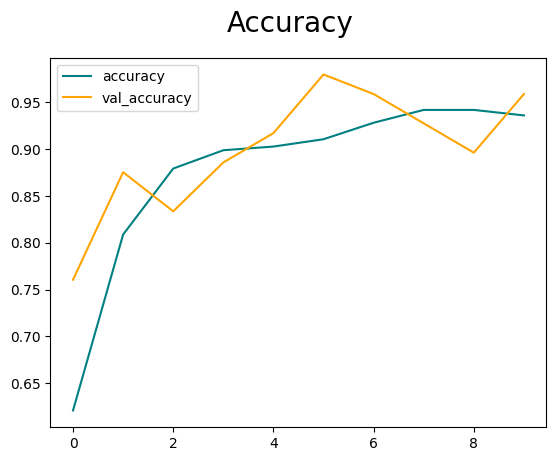

In [111]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 8.Evaluate

In [112]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [113]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [114]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [115]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9310345, shape=(), dtype=float32) tf.Tensor(0.96428573, shape=(), dtype=float32) tf.Tensor(0.9375, shape=(), dtype=float32)


## 9.Test

In [116]:
import cv2

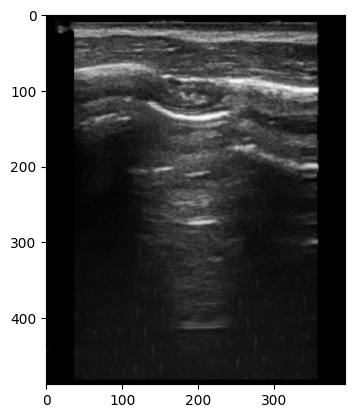

In [117]:
img = cv2.imread('dataset1/unknown_images/1.png')#dataset1/unknown_images/1.png
plt.imshow(img)
plt.show()

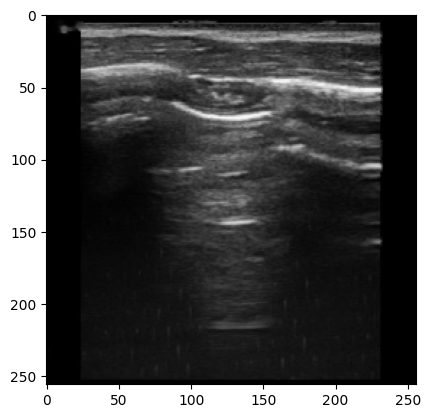

In [118]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [120]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [121]:
yhat

array([[0.13562292]], dtype=float32)

In [122]:
if yhat < 0.5: 
    print(f'Predicted class is Normal')
else:
    print(f'Predicted class is Sick')

Predicted class is Normal


## 10. Save the Model

In [124]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','dataset1modely.h5'))
new_model = load_model('models/dataset1modely.h5')
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.13562292]], dtype=float32)